# Float 4902549 - Possible Error is traj File JULD

In [2]:
# relevant imports, wmo number

from pathlib import Path
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt

import argopandas as argo

wmo = 4902549

# get all files associated with the float
flt = argo.float(wmo)
print(flt)

# where I keep my argo data you will need to change this on another machine
argo_path = Path('/Users/GordonC/Documents/data/Argo/dac')

argo.float(4902549)
  .prof <argo.prof[argo.path.is_float(argo.prof['file'], 4902549)]>
  .traj <argo.traj[argo.path.is_float(argo.traj['file'], 4902549)]>
  .tech <argo.tech[argo.path.is_float(argo.tech['file'], 4902549)]>
  .meta <argo.meta[argo.path.is_float(argo.meta['file'], 4902549)]>
  .bio_prof <argo.bio_prof[argo.path.is_float(argo.bio_prof['file'], 4902549)]>
  .synthetic_prof <argo.synthetic_prof[argo.path.is_float(argo.synthetic_prof['file'], 4902549)]>
  .bio_traj <argo.bio_traj[argo.path.is_float(argo.bio_traj['file'], 4902549)]>


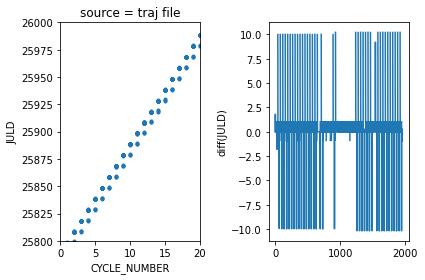

In [11]:
# load the traj file, see if cycle number and JULD are inconsistent
# (they shouldn't be)
traj_file = argo_path / flt.bio_traj.file.iloc[0]
traj = Dataset(traj_file)

fig, axes = plt.subplots(1, 2)
axes[0].plot(traj['CYCLE_NUMBER'][:], traj['JULD'][:], '.')
axes[0].set_xlabel('CYCLE_NUMBER')
axes[0].set_ylabel('JULD')
axes[0].set_title('source = traj file')
axes[0].set_xlim((0,20))
axes[0].set_ylim((25800, 26000))
axes[1].plot(np.diff(traj['JULD'][:]))
axes[1].set_ylabel('diff(JULD)')
fig.tight_layout()


Reading 68 files


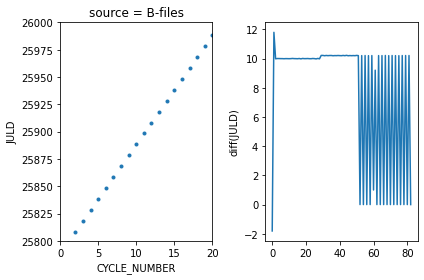

In [12]:
# load the bio index and do the same check on cycle number/JULD
time_data = flt.bio_prof.prof[['JULD']]
# parse out cycle number
time_data['CYCLE'] = [int(f[0].split('_')[-1].split('.')[0].replace('D', '')) for f in time_data.index]
fig, axes = plt.subplots(1, 2)
axes[0].plot(time_data.CYCLE, time_data.JULD, '.')
axes[0].set_xlabel('CYCLE_NUMBER')
axes[0].set_ylabel('JULD')
axes[0].set_title('source = B-files')
axes[0].set_xlim((0,20))
axes[0].set_ylim((25800, 26000))
axes[1].plot(np.diff(time_data.JULD))
axes[1].set_ylabel('diff(JULD)')
fig.tight_layout()

In [20]:
# are there more unique values in the traj file?
traj['MEASUREMENT_CODE'][:][traj['MEASUREMENT_CODE'][:] > 1000]

masked_array(data=[--, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100,
                   1100, 1100, 1100, 1100, 1100, 1100